# 0. 자신이 사용하는 torch 버전과 GPU 사용 가능 여부를 확인하세요.

In [449]:
import torch
import numpy as np
import torch.nn as nn
import torchvision.transforms.v2 as v2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [450]:
torch.__version__

'2.2.2'

In [451]:
torch.cuda.is_available()

True

# 1. input_size 가 1이고, hidden_size 10인 RNN 객체를 생성하시오. (1, 1, 1) 데이터를 torch.rand 로 생성 후, RNN 객체에 전달하여 출력값을 확인하시오. (데이터 값, shape)

* RNN 객체 생성 시 batch 데이터의 위치를 고려하시오.
* RNN 객체의 반환값 형태에 주의하시오. (공식 문서 참고)

In [452]:
rnn = nn.RNN(1,10,batch_first=True)


In [453]:
x = torch.rand(1,1,1)

In [454]:
y,h = rnn(x)

In [455]:
y.shape, h.shape

(torch.Size([1, 1, 10]), torch.Size([1, 1, 10]))

# 2. input_size 가 2이고, hidden_size 5인 RNN 객체를 생성하시오. (1, 1, 2) 데이터를 torch.rand 로 생성 후, RNN 객체에 전달하여 출력값을 확인하시오. (데이터 값, shape)

In [456]:
rnn2 = nn.RNN(2, 5, batch_first=True)

In [457]:
x2 = torch.rand(1,1,2)
y2, h2 = rnn2(x2)


In [458]:
y2.shape, h2.shape

(torch.Size([1, 1, 5]), torch.Size([1, 1, 5]))

# 3. input_size 가 1이고, hidden_size 10인 LSTM 객체를 생성하시오. (1, 1, 1) 데이터를 torch.rand 로 생성 후, LSTM 객체에 전달하여 출력값을 확인하시오. (데이터 값, shape)

* LSTM 객체 생성 시 batch 데이터의 위치를 고려하시오.
* LSTM 객체의 반환값 형태에 주의하시오. (공식 문서 참고)

In [459]:
lstm = nn.LSTM(1, 10, batch_first=True)

In [460]:
x3 = torch.rand(1,1,1)
y3, (h3,zz) = lstm(x3)

In [461]:
y3.shape, h3.shape, zz.shape

(torch.Size([1, 1, 10]), torch.Size([1, 1, 10]), torch.Size([1, 1, 10]))

# 4. input_size 가 2이고, hidden_size 5인 LSTM 객체를 생성하시오. (1, 1, 2) 데이터를 torch.rand 로 생성 후, LSTM 객체에 전달하여 출력값을 확인하시오. (데이터 값, shape)

In [462]:
lstm2 = nn.LSTM(2, 5, batch_first=True)
x4 = torch.rand(1,1,2)
y4, (h4, zz1) = lstm2(x4)

In [463]:
y4.shape, h4.shape, zz1.shape

(torch.Size([1, 1, 5]), torch.Size([1, 1, 5]), torch.Size([1, 1, 5]))

# 5. input_size 가 1 이고 seq_len 이 30 인 입력 데이터를 torch.rand 로 생성하시오. 3번에서 생성한 LSTM 객체를 이용하여 LSTM 객체에 전달하여 출력값을 확인하시오 (shape)

In [464]:
x5 = torch.rand(1, 30, 1)
lstm = nn.LSTM(1, 10, batch_first=True)
y5, (h5, zz2) = lstm(x5)
y5.shape, h5.shape, zz2.shape

(torch.Size([1, 30, 10]), torch.Size([1, 1, 10]), torch.Size([1, 1, 10]))

# 6. input_size 가 2 이고 seq_len 이 60 인 입력 데이터를 torch.rand 로 생성하시오. 4번에서 생성한 LSTM 객체를 이용하여 LSTM 객체에 전달하여 출력값을 확인하시오 (shape)

In [465]:
x6 = torch.rand(1, 60, 2)
lstm2 = nn.LSTM(2, 10, batch_first=True)
y6, (h6, zz3) = lstm(x6)
y6.shape, h6.shape, zz3.shape

(torch.Size([1, 60, 10]), torch.Size([1, 1, 10]), torch.Size([1, 1, 10]))

# 7. 순환신경망에서 many-to-one 모델은 여러 개의 입력을 받아 하나의 값을 출력하는 구조이다.

* 예를 들어, 스타벅스 주가를 예측하려고 할 때, **과거 30일의 주가 데이터**를 이용하여 **내일의 주가**를 예측하는 경우이다.

* 예를 참고하여 이에 알맞은 입력 데이터와 LSTM 모델을 생성하고 출력값의 shape 을 확인하세요. (단, batch_size=32, hidden_size=10 이다.)

In [466]:
x = torch.rand(32, 30, 1)
lstm = nn.LSTM(1, 10, batch_first=True)
y, (h,z) = lstm(x)
y.shape, h.shape, z.shape

(torch.Size([32, 30, 10]), torch.Size([1, 32, 10]), torch.Size([1, 32, 10]))

# 8. 순환신경망에서 many-to-one 모델은 여러 개의 입력을 받아 하나의 값을 출력하는 구조이다.

* 예를 들어, 스타벅스 주가를 예측하려고 할 때, **과거 30일의 주가와 거래량 데이터**를 이용하여 **내일의 주가**를 예측하는 경우이다.

* 예를 참고하여 이에 알맞은 입력 데이터와 LSTM 모델을 생성하고 출력값의 shape 을 확인하세요. (단, batch_size=32, hidden_size=10 이다.)

In [467]:
x = torch.rand(32, 30, 2)
lstm = nn.LSTM(2, 10, batch_first=True)
y, (h,z) = lstm(x)
y.shape, h.shape, z.shape

(torch.Size([32, 30, 10]), torch.Size([1, 32, 10]), torch.Size([1, 32, 10]))

# 9. 8번의 출력에서 가장 마지막 출력값을 내일의 스타벅스 주가로 정했다. 해당 값을 출력하시오. (slicing 이용)

In [468]:
y[:,-1,:] 

tensor([[-0.2417, -0.1252, -0.0975,  0.0449,  0.0059, -0.1402,  0.1263, -0.1202,
          0.1659,  0.0194],
        [-0.2290, -0.1043, -0.0876,  0.0404,  0.0355, -0.1278,  0.1101, -0.1157,
          0.1665,  0.0160],
        [-0.2645, -0.1693, -0.1080,  0.0720, -0.0292, -0.1670,  0.1315, -0.1058,
          0.1793,  0.0089],
        [-0.2167, -0.0937, -0.0978,  0.0192,  0.0195, -0.1137,  0.1254, -0.1353,
          0.1582,  0.0223],
        [-0.2553, -0.1604, -0.0913,  0.0776,  0.0272, -0.1732,  0.1187, -0.0947,
          0.1804,  0.0050],
        [-0.2044, -0.0646, -0.1022, -0.0024,  0.0030, -0.0885,  0.1265, -0.1525,
          0.1515,  0.0315],
        [-0.2139, -0.0627, -0.0791,  0.0136,  0.0460, -0.0988,  0.1044, -0.1278,
          0.1530,  0.0245],
        [-0.2274, -0.1247, -0.1053,  0.0372, -0.0003, -0.1345,  0.1282, -0.1290,
          0.1702,  0.0215],
        [-0.2454, -0.1314, -0.0916,  0.0574,  0.0115, -0.1526,  0.1135, -0.1123,
          0.1754,  0.0194],
        [-0.2342, -

# 10. 9번의 마지막 출력값의 모양이 1이 아니라 10이다. 이를 위해, Linear 레이어를 추가하여 마지막 출력이 (32, 1) 가 되도록 코드를 작성하시오.

* 입력데이터 > LSTM > Linear > 출력데이터 순서로 코드를 작성하시오.

In [469]:
x = torch.rand(32, 30, 1)
lstm = nn.LSTM(1, 10, batch_first=True)
y, (h,z) = lstm(x)
linear = nn.Linear(10,1)
linear(y[:,-1,:]).shape

torch.Size([32, 1])

# 11. 10번에서 LSTM 객체와 Linear 객체를 nn.Sequential 로 하나로 묶어 model 변수에 저장해 보세요. 그런 다음 입력 데이터를 전달하여 출력을 확인해 보세요. 에러가 발생하면 가능한 방법을 고민하여 구현해 보세요. (hint: nn.Module)

In [470]:
class StockPrediction(nn.Module):
  def __init__(self, input_size= 1, hidden_size=10, output_size=1):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.linear = nn.Linear(hidden_size, output_size)
    
  def forward(self, x):
    y, (h, c) = self.lstm(x)
    x = self.linear(y[:,-1,:])
    return x

In [471]:
model = StockPrediction(1, 10, 1)

In [472]:
# nn.Sequential(lstm, linear)
# model(data).to

In [473]:
data = torch.rand(32, 30, 2)
model(data).shape

torch.Size([32, 1])

# 12. yfinance 라이브러리를 이용하여 스타벅스(ticker=SUBX) 주가를 다운로드 합니다. 다음으로 Close 데이터만 data 변수에 저장한 후, type 과 shape 을 확인해 봅니다.

* yfinance 데이터는 column 인덱스가 MultiIndex 입니다.

```
pip install yfinance
```



In [474]:
!pip install yfinance

In [475]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,8.890199,8.998193,8.836202,8.994336,16370000
2010-01-05,9.098472,9.256605,8.828487,8.855485,30058800
2010-01-06,9.032903,9.110041,8.971192,9.056044,14209600
2010-01-07,9.009762,9.075329,8.944194,8.978906,10256000
2010-01-08,8.978907,9.102328,8.944194,8.948051,10274800


In [476]:
import yfinance as yf

ticker_symbol = "SBUX"
df = yf.download(ticker_symbol, start="2010-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [477]:
df.columns

MultiIndex([( 'Close', 'SBUX'),
            (  'High', 'SBUX'),
            (   'Low', 'SBUX'),
            (  'Open', 'SBUX'),
            ('Volume', 'SBUX')],
           names=['Price', 'Ticker'])

In [478]:
df[('Close', 'SBUX')]

Date
2010-01-04     8.890199
2010-01-05     9.098472
2010-01-06     9.032903
2010-01-07     9.009762
2010-01-08     8.978907
                ...    
2023-12-22    93.432343
2023-12-26    93.814774
2023-12-27    93.442146
2023-12-28    94.069740
2023-12-29    94.148186
Name: (Close, SBUX), Length: 3522, dtype: float64

In [479]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [480]:
df.Close

Date
2010-01-04     8.890199
2010-01-05     9.098472
2010-01-06     9.032903
2010-01-07     9.009762
2010-01-08     8.978907
                ...    
2023-12-22    93.432343
2023-12-26    93.814774
2023-12-27    93.442146
2023-12-28    94.069740
2023-12-29    94.148186
Name: Close, Length: 3522, dtype: float64

In [481]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,8.890199,8.998193,8.836202,8.994336,16370000
2010-01-05,9.098472,9.256605,8.828487,8.855485,30058800
2010-01-06,9.032903,9.110041,8.971192,9.056044,14209600
2010-01-07,9.009762,9.075329,8.944194,8.978906,10256000
2010-01-08,8.978907,9.102328,8.944194,8.948051,10274800


In [482]:
data = df['Close']

In [483]:
type(data), data.shape

(pandas.core.series.Series, (3522,))

In [484]:
df['Close'].iloc[:30].shape

(30,)

In [485]:
df['Close'].iloc[:30]

Date
2010-01-04    8.890199
2010-01-05    9.098472
2010-01-06    9.032903
2010-01-07    9.009762
2010-01-08    8.978907
2010-01-11    8.951907
2010-01-12    8.801489
2010-01-13    9.017475
2010-01-14    9.083045
2010-01-15    8.975050
2010-01-19    9.094615
2010-01-20    8.982764
2010-01-21    9.133182
2010-01-22    8.836201
2010-01-25    8.639499
2010-01-26    8.693496
2010-01-27    8.643356
2010-01-28    8.516078
2010-01-29    8.404223
2010-02-01    8.573928
2010-02-02    8.658781
2010-02-03    8.651066
2010-02-04    8.411939
2010-02-05    8.369513
2010-02-08    8.450506
2010-02-09    8.558500
2010-02-10    8.627927
2010-02-11    8.701208
2010-02-12    8.716636
2010-02-16    8.824630
Name: Close, dtype: float64

# 13. seq_len=30 을 고려하여 X, y dataset 을 생성하는 코드를 작성하세요. 이때, X 는 3d, y 는 2d 로 shape 을 조정해 주세요 (hint: reshape)

In [486]:
import numpy as np

data_np = data.values
type(data_np), data_np.shape

(numpy.ndarray, (3522,))

In [487]:
seq_len = 30
data_np[0:0+seq_len].shape, data_np[0+seq_len]

((30,), 8.928767204284668)

In [488]:
data_np[1:1+seq_len].shape, data_np[1+seq_len]

((30,), 8.971192359924316)

In [489]:
data_np[2:2+seq_len].shape, data_np[2+seq_len]

((30,), 9.009761810302734)

In [490]:
import numpy as np

data_np = data.values

seq_len = 30
X, y = [], []

for i in range(len(data_np)-seq_len) :
  X.append(data_np[i:i+seq_len])
  y.append(data_np[i+seq_len])
  
  
  
X = np.array(X).reshape(-1,seq_len,1)
y = np.array(y).reshape(-1,1)

In [491]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (3492, 30, 1), (3492, 1))

# 14. 13번에서 생성한 데이터셋을 이용하여 DataLoder 객체를 생성하고, 11번을 참고하여 데이터에 알맞은 모델을 생성합니다 (hidden_size=10).

In [492]:
from torch.utils.data import DataLoader, TensorDataset

X_data, y_data = torch.tensor(X).float(), torch.tensor(y).float()
loader_train = DataLoader(TensorDataset(X_data, y_data), batch_size=32, shuffle=True)

In [493]:
# model = 

In [494]:
for I, label in loader_train:
  print(model(I).shape)
  break

torch.Size([32, 1])


# 15. 모델을 훈련하기 위한 train loop 를 작성하여 모델을 훈련시킵니다. loop 가 한 번만 성공적으로 동작하도록 해 보세요.

* Loss: nn.MSELoss
* Optimizer: optim.Adam

In [495]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [496]:
total_loss = 0

for X_batch, y_batch in loader_train:
  y_pred = model(X_batch)
  optimizer.zero_grad()
  loss = loss_fn(y_pred, y_batch)
  loss.backward()
  optimizer.step()
  print(loss.item())
  total_loss += loss.item()
  break

total_loss/len(loader_train)




3964.58984375


36.04172585227273

# 16. epochs=200 으로 모델을 훈련시킵니다. 한 번의 epoch 마다 loss 값을 출력합니다.

* GPU 를 사용할 수 있으면 적극 활용하세요.

In [497]:
epochs = 200
for epoch in range(epochs):
  total_loss = 0
  for X_batch, y_batch in loader_train:
      # print(X.shape), print(y.shape)
      # break
      y_pred = model(X_batch)
      optimizer.zero_grad()
      loss = loss_fn(y_pred, y_batch)
      loss.backward()
      optimizer.step()
      # print(loss.item())
      total_loss += loss.item()    
      # break

  epoch_loss = total_loss / len(loader_train)
  print(f'epoch: {epoch}, loss: {epoch_loss}')

epoch: 0, loss: 3563.744131747159
epoch: 1, loss: 3350.0023504083806
epoch: 2, loss: 3212.4983076615767
epoch: 3, loss: 3043.496845037287
epoch: 4, loss: 2898.7633356267756
epoch: 5, loss: 2759.3764149058948
epoch: 6, loss: 2662.0689641779118
epoch: 7, loss: 2547.270487837358
epoch: 8, loss: 2467.302131791548
epoch: 9, loss: 2361.6195351340552
epoch: 10, loss: 2277.8442815607245
epoch: 11, loss: 2206.295741410689
epoch: 12, loss: 2120.4854214754973
epoch: 13, loss: 2032.6917319557883
epoch: 14, loss: 1977.4001686789773
epoch: 15, loss: 1901.850837846236
epoch: 16, loss: 1823.420028409091
epoch: 17, loss: 1768.8311484596945
epoch: 18, loss: 1701.1736655495383
epoch: 19, loss: 1637.9772516424005
epoch: 20, loss: 1579.421406693892
epoch: 21, loss: 1519.1390053488992
epoch: 22, loss: 1465.2115234375
epoch: 23, loss: 1416.2234818892045
epoch: 24, loss: 1369.9008872292259
epoch: 25, loss: 1304.3508470015092
epoch: 26, loss: 1264.4042314009232
epoch: 27, loss: 1206.098295177113
epoch: 28, los

# 17. 실제 값과 훈련된 모델의 예측값을 plot 으로 그려봅니다.

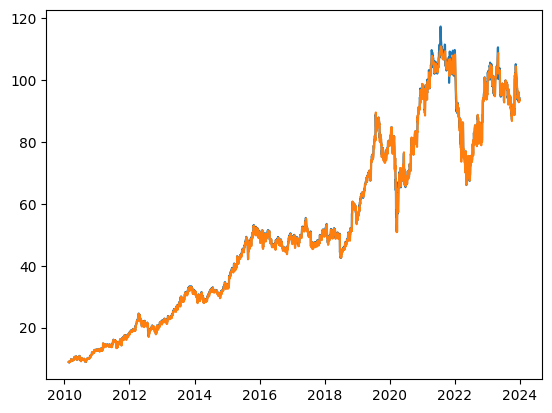

In [498]:
import matplotlib.pyplot as plt

model.eval()

X_tensor = torch.tensor(X).float()
with torch.no_grad():
  y_pred = model(X_tensor).numpy()
  #y_pred = model(X_tensor).cpu().numpy()

plt.plot(df.index[seq_len:], y)
plt.plot(df.index[seq_len:], y_pred)

# 18. 모델의 성능을 MSE, RMSE, MAE, R2 메트릭을 이용하여 측정해 봅니다.

In [499]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

f"MSE: {mse:.5f}, RMSE: {rmse:.5f}, MAE: {mae:.5f}, R2: {r2:.5f}"

'MSE: 1.13752, RMSE: 1.06655, MAE: 0.65037, R2: 0.99871'

# 19. 12번에서 생성한 데이터를 이용하여 다음을 수행하시오.

* sklearn 의 MinMaxScaler 를 이용하여 데이터를 정규화 합니다. (fit_transform)
* 9:2 의 비율로 train/test 로 데이터를 split 하여, X_trian, X_test, y_train, y_test 변수에 저장합니다.
* train/test 용 DataLoader 객체를 생성하여 loader_train, loader_test 변수에 저장합니다.
* 모델 훈련 시에는 loader_train 을 이용하고, 모델의 예측력을 확인할 때는 loader_test 를 이용합니다.

In [500]:
model.eval()

y_pred_list = []
with torch.no_grad():
  for X_batch, _ in loader_test:
    y_pred = model(X_batch).numpy()
    #y_pred = model(X_batch).cpu().numpy()
    y_pred_list.append(y_pred)

y_pred = np.concatenate(y_pred_list, axis=0)

NameError: name 'loader_test' is not defined

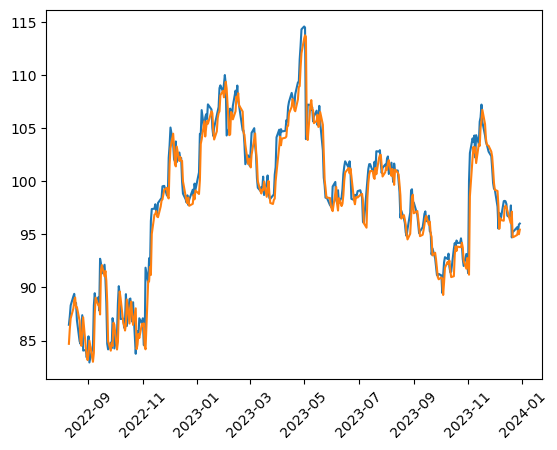

In [ ]:
import matplotlib.pyplot as plt

y_test_ori = scaler.inverse_transform(y_test)
y_pred_ori = scaler.inverse_transform(y_pred)

plt.xticks(rotation=45)
plt.plot(df.index[train_size + seq_len:], y_test_ori)
plt.plot(df.index[train_size + seq_len:], y_pred_ori)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_ori, y_pred_ori)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ori, y_pred_ori)
r2 = r2_score(y_test_ori, y_pred_ori)

print(f"MSE: {mse:.5f}, RMSE: {rmse:.5f}, MAE: {mae:.5f}, R2: {r2:.5f}")

MSE: 2.65828, RMSE: 1.63042, MAE: 1.14909, R2: 0.94367
